Epoch [100/1000], Loss: 0.1085
Epoch [200/1000], Loss: 0.0597
Epoch [300/1000], Loss: 0.0441
Epoch [400/1000], Loss: 0.0361
Epoch [500/1000], Loss: 0.0312
Epoch [600/1000], Loss: 0.0278
Epoch [700/1000], Loss: 0.0254
Epoch [800/1000], Loss: 0.0235
Epoch [900/1000], Loss: 0.0220
Epoch [1000/1000], Loss: 0.0207
Test Accuracy: 100.00%


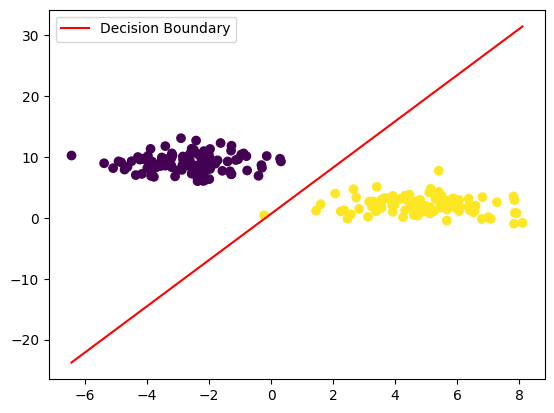

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. 生成二分类数据
X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=1.5)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. 定义逻辑回归模型
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)  # 输入维度2，输出维度1

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # 使用Sigmoid激活函数

# 实例化模型
model = LogisticRegressionModel()

# 3. 定义损失函数和优化器
criterion = nn.BCELoss()  # 二分类交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 随机梯度下降，学习率为0.01

# 4. 训练模型
epochs = 1000
for epoch in range(epochs):
    model.train()  # 切换到训练模式
    optimizer.zero_grad()  # 清零梯度

    # 前向传播
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)  # 计算损失

    # 反向传播
    loss.backward()
    optimizer.step()  # 更新参数

    # 打印训练进度
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# 5. 评估模型
model.eval()  # 切换到评估模式
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_class = (y_pred_test >= 0.5).float()  # 以0.5为阈值进行分类
    accuracy = accuracy_score(y_test, y_pred_class)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 可视化分类结果
plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap='viridis')
x_boundary = torch.linspace(X[:, 0].min(), X[:, 0].max(), 100).reshape(-1, 1)
y_boundary = -(model.linear.weight[0, 0] * x_boundary + model.linear.bias[0]) / model.linear.weight[0, 1]
plt.plot(x_boundary, y_boundary.detach(), color='red', label="Decision Boundary")
plt.legend()
plt.show()
